In [1]:
import numpy as np
import scipy.stats as sps
import scipy.optimize as spo

import matplotlib.pyplot as plt

Случайный датасет. Точки, лежащие на прямой $y = 0.5x + 2$ со нормально распределённой случайной ошибкой.

In [2]:
A = 0.5
B = 2.0
n = 100

x = np.linspace(0,10, n)
y = A*x + B + np.random.normal(scale=.5, size=n)

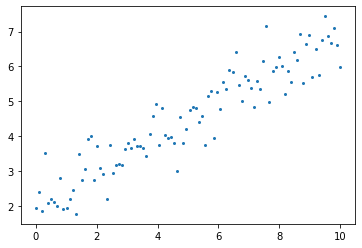

In [3]:
plt.scatter(x,y, s=4)

Линейная модель $y = ax+b$

In [4]:
def linear(x, a,b):
    return a*x+b

Подбор параметров линейной модели методом наименьших квадратов

In [5]:
((a,b), cov) = spo.curve_fit(linear, xdata=x, ydata=y)

In [6]:
a,b

(0.48131338327467227, 2.0807809838898876)

Случайная составляющая

In [7]:
u = y - (a*x+b)

In [8]:
u_mean, u_sigma = sps.norm.fit(u)

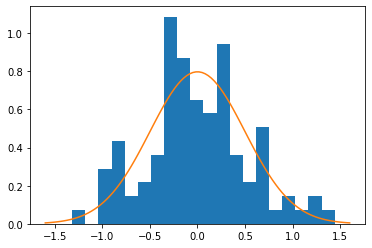

In [9]:
_u = np.linspace(u_mean - u_sigma*3, u_mean + u_sigma*3, 100)
plt.hist(u, bins=20, density=True)

plt.plot(_u, sps.norm(0, 0.5).pdf(_u))

Несмещенная оценка дисперсии случайного члена $u$ $\sigma_u^2 = \frac{1}{n-2}\sum({u_i^2 - \overline{u}^2})$

In [10]:
sigma_square = sps.sem(u, ddof=2)

Дисперсия $x$

In [11]:
var_x = np.var(x)

Дисперсия $a$: $D[a] = \frac{1}{n}\frac{\sigma_u^2}{D[x]}$

In [12]:
var_a = sigma_square/n/var_x

Дисперсия $b$: $D[b] = \frac{1}{n}\frac{\overline{x^2}}{D[x]}$

In [13]:
var_b = 1.0/n*np.mean(x*x)/var_x

In [14]:
var_a, var_b

(6.33845030420234e-05, 0.039405940594059406)

Доверительный интервал для $a$ через $t$ распределение Стьюдента с уровнем ошибки $\alpha = 0.05$

In [15]:
conf_a = sps.t.interval(0.95, df = n-1, loc=a, scale=np.sqrt(var_a))
conf_a

(0.4655161620380061, 0.4971106045113384)

Доверительный интервал для $b$ через $t$ распределение Стьюдента с уровнем ошибки $\alpha = 0.05$

In [19]:
conf_b = sps.t.interval(0.95, df = n-1, loc = b, scale = np.sqrt(var_b))
conf_b

(1.6868954737564044, 2.474666494023371)

График линейных моделей, соответствующих крайним точкам доверительных интервалов

In [17]:
def mk_model(a,b):
    return lambda x: linear(x, a,b)

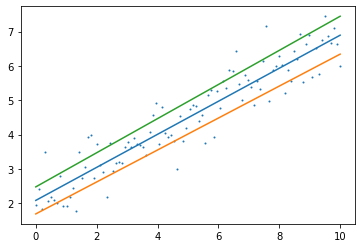

In [18]:
plt.scatter(x, y, s=1)
plt.plot(x, mk_model(a,b)(x))
plt.plot(x, mk_model(conf_a[0], conf_b[0])(x))
plt.plot(x, mk_model(conf_a[1], conf_b[1])(x))